<center> <h2><u> Data Bootcamp Final Project: </u></h2>
<br>


<h1>Do Airbnb Prices Reflect Cost of Living?  </h1>
<h4> Comparing Airbnb data from 30 cities with their living index and income level.</h4>

<br>
<br>


<div class="inline-block"> <img src="https://upload.wikimedia.org/wikipedia/commons/a/a0/Airbnb.png" style="width: 970px;"/> </div> 

<br>
<br>


**Author: Keshar Shahi**

**Email: [ks3984@stern.nyu.edu](ks3984@stern.nyu.edu)**



## Introduction

Founded in 2008, Airnb now has more than 150 million users. The online marketplace and hospitality service spans across 65000 cities in 191 countries. This service has now hosts more than half million guests away from their home. The  [projected](https://expandedramblings.com/index.php/airbnb-statistics/) revenue for the company is more than $2.8 Billion in 2017. Disrupting the hotel industry world-wide, Airbnb has now change the way people travel. As there are more than 4 million listings around the globe, it certainly has become more like an easy alternative to a hotel stay.

But what does these Airbnb stays’ price reflects? As many of these listings are part of people’s own house or apartment, the pricing is certainly derived from a different calculation than a hotel’s room price. 

In this project, I would like to see the prices of these listing in different cities around the world and compare them with the income level of those host cities and their living indexes.

Can a person with an average income of a particular city afford an Airbnb stay in the same city? I would like to find relation between income levels of a city and Airbnb stays. 


#### Packages Used in this project:
In the project below, I'm goint to use the following packages: <br>
<i><b> Pandas </b></i> will be my major tool to import data, merge and analyze them. 
I will be using <i><b>Matplotlib package <b></i> to plot my graphs and charts. I will also use <i><b> Seaborn </b></i> as a tool to create graphs and charts.<br> <i><b>Basemap</b> </i> will allow me create a simple map to represnt my data points in my project.
Similarly, <i><b>numpy</b> </i> will allow be used to perform operations and transformations of the data (e.g. log of stuff). <br>


In [34]:

import sys
import pandas as pd                   
import matplotlib.pyplot as plt      
import datetime as dt                  
import numpy as np                    
import seaborn as sns
import statistics
import csv
from mpl_toolkits.basemap import Basemap
import statsmodels.formula.api as smf
import scipy as sc
import pylab
from matplotlib.colors import Normalize


%matplotlib inline                     

print('Python version: ', sys.version)
print('Pandas version: ', pd.__version__)
print('Today: ', dt.date.today())

Python version:  3.6.0 |Anaconda custom (x86_64)| (default, Dec 23 2016, 13:19:00) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]
Pandas version:  0.19.2
Today:  2017-12-21


# Data Report

Airbnb data from [Inside Airbnb](http://insideairbnb.com/get-the-data.html)<br>
[OECD](https://measuringurban.oecd.org/)<br>
Cost of living:<br>
[Economist's ](https://www.economist.com/blogs/graphicdetail/2017/03/daily-chart-13)<br>
[Mercer](https://mobilityexchange.mercer.com/Insights/cost-of-living-rankings#rankings)

### Data Cleaning

The data sets I have are from different sources in different formats. I will be cleaning up all those all data sets and create new dataframes for my analysis.

In [2]:
oecd_cities = 'https://measuringurban.oecd.org/content/DATA_METRO_EXPLORER.xlsx'
url1 =   'http://data.insideairbnb.com/the-netherlands/north-holland/amsterdam/2017-04-02/visualisations/listings.csv'
url2 =   'http://data.insideairbnb.com/belgium/vlg/antwerp/2017-05-12/visualisations/listings.csv'
url3 =   'http://data.insideairbnb.com/greece/attica/athens/2017-05-09/visualisations/listings.csv'
url4 =   'http://data.insideairbnb.com/united-states/tx/austin/2017-03-07/visualisations/listings.csv'
url5 =   'http://data.insideairbnb.com/spain/catalonia/barcelona/2017-04-08/visualisations/listings.csv'
url6 =   'http://data.insideairbnb.com/germany/be/berlin/2017-05-08/visualisations/listings.csv'
url7 =   'http://data.insideairbnb.com/united-states/ma/boston/2017-10-06/visualisations/listings.csv'
url8 =   'http://data.insideairbnb.com/belgium/bru/brussels/2017-05-09/visualisations/listings.csv'
url9 =   'http://data.insideairbnb.com/united-states/il/chicago/2017-05-10/visualisations/listings.csv'
url10 =  'http://data.insideairbnb.com/denmark/hovedstaden/copenhagen/2017-06-15/visualisations/listings.csv'
url11 =  'http://data.insideairbnb.com/united-states/co/denver/2016-05-16/visualisations/listings.csv'
url12 =  'http://data.insideairbnb.com/ireland/leinster/dublin/2017-02-18/visualisations/listings.csv'
url13 =  'http://data.insideairbnb.com/united-kingdom/scotland/edinburgh/2017-09-18/visualisations/listings.csv'
url14 =  'http://data.insideairbnb.com/switzerland/geneva/geneva/2016-08-08/visualisations/listings.csv'
url15 =  'http://data.insideairbnb.com/united-kingdom/england/london/2017-03-04/visualisations/listings.csv'
url16 =  'http://data.insideairbnb.com/spain/comunidad-de-madrid/madrid/2017-04-08/visualisations/listings.csv'
url17 =  'http://data.insideairbnb.com/united-kingdom/england/manchester/2016-04-10/visualisations/listings.csv'
url18 =  'http://data.insideairbnb.com/australia/vic/melbourne/2017-04-03/visualisations/listings.csv'
url19 =  'http://data.insideairbnb.com/canada/qc/montreal/2016-05-04/visualisations/listings.csv'
url20 =  'http://data.insideairbnb.com/united-states/la/new-orleans/2017-06-02/visualisations/listings.csv'
url21 =  'http://data.insideairbnb.com/united-states/ny/new-york-city/2017-10-02/visualisations/listings.csv'
url22 =  'http://data.insideairbnb.com/france/ile-de-france/paris/2017-04-04/visualisations/listings.csv'
url23 =  'http://data.insideairbnb.com/united-states/or/portland/2017-04-07/visualisations/listings.csv'
url24 =  'http://data.insideairbnb.com/canada/qc/quebec-city/2017-09-12/visualisations/listings.csv'
url25 =  'http://data.insideairbnb.com/italy/lazio/rome/2017-05-08/visualisations/listings.csv'
url26 =  'http://data.insideairbnb.com/united-states/ca/san-francisco/2017-10-02/visualisations/listings.csv'
url27 =  'http://data.insideairbnb.com/australia/nsw/sydney/2017-04-03/visualisations/listings.csv'
url28 =  'http://data.insideairbnb.com/canada/on/toronto/2017-06-03/visualisations/listings.csv'
url29 =  'http://data.insideairbnb.com/canada/bc/vancouver/2017-10-06/visualisations/listings.csv'
url30 =  'http://data.insideairbnb.com/italy/veneto/venice/2017-05-09/visualisations/listings.csv'
url31 =  'http://data.insideairbnb.com/united-states/dc/washington-dc/2017-05-10/visualisations/listings.csv'
urls =   [url1, url2,url3,url4,url5,url6,url7,url8,url9,url11,url12,url13,url14,url15,url16,url17,url18,url19,url20,url21,url22,url23,url24,url25,url26,url27,url28,url29,url30,url31]
index1=  'mercer_rank.csv'
index2=  'economist_rank.csv'


#### Airbnb data cleaning
I will extract Airbnb data from [Inside Airbnb](http://insideairbnb.com/get-the-data.html) website. Here, i already have individual cities' Airbnb listing's deatils on csv file. I will pull those 30 csv files and merge the data together to get a single dataframe according to the property type.

I will extract each cities' summary data on the lisitng. This will inculde the mean, count, meadian, max and min data.

#### Dealing with outliers data
Upon checking the data, I found numerous Airbnb stay with extremely high prices and many of those property have zero reviews. So, I have excluded all the listings who lacks any review.

In [3]:
#creating a datafram for listing listed as entire home or apartments
file=[]
for item in urls:
    df=pd.read_csv(item) #read each file from urls as csv
    df=df[['room_type','price','number_of_reviews']] #extracting only necessary columns
    df=df.loc[df['number_of_reviews'] > 0]
    df=df.loc[df['room_type'] == 'Entire home/apt'] #extracting type of property
    df=df.describe().T #we just need the summary of each city
    df=df.drop(['number_of_reviews'])
    file.append(df)
    
entire_home=(pd.concat(file)) #combining all summaries from cities
entire_home['city']=['amsterdam','antwerp','athens','austin','barcelona','berlin','boston','brussels','chicago',
                     'denver','dublin','edinburgh','geneva','london','madrid','manchester','melbourne','montreal',
                     'new_orleans','new_york','paris','portland','quebec','rome','san_francisco','sydney','toronto',
                     'vancouver','venice','washington']
entire_home=entire_home.set_index('city')

#creating a datafram for listings listed as single/private room
files=[]
for item in urls:
    df=pd.read_csv(item)
    df=df[['room_type','price','number_of_reviews']] #extracting only necessary columns
    df=df.loc[df['number_of_reviews'] > 0]
    df=df.loc[df['room_type'] == 'Private room']
    df=df.describe().T
    df=df.drop(['number_of_reviews'])
    files.append(df)
    
private_room=(pd.concat(files)) 
private_room['city']=['amsterdam','antwerp','athens','austin','barcelona','berlin','boston','brussels','chicago',
                     'denver','dublin','edinburgh','geneva','london','madrid','manchester','melbourne','montreal',
                     'new_orleans','new_york','paris','portland','quebec','rome','san_francisco','sydney','toronto',
                     'vancouver','venice','washington']
private_room=private_room.set_index('city')

In [4]:
entire_home.head(2)

,count,mean,std,min,25%,50%,75%,max
city,,,,,,,,
amsterdam,10065.0,145.725981,80.890983,20.0,99.0,125.0,165.0,2100.0
antwerp,715.0,85.499301,49.482062,25.0,58.5,73.0,99.0,500.0


In [5]:
private_room.head(2)

,count,mean,std,min,25%,50%,75%,max
city,,,,,,,,
amsterdam,2885.0,87.084575,46.107362,19.0,60.0,79.0,100.0,925.0
antwerp,299.0,48.411371,24.123174,15.0,34.0,40.0,59.0,145.0


### OECD Cities data cleaning

OECD has a [webpage](https://measuringurban.oecd.org/) where it has datasets of 290 cities with more than 50 different variables. The raw data set is available on excel format. For my project, I will extract the dataset and clean the fie to get my desired dataframe. I will only keep variables I require and cities I am using for my analysis.

In [6]:
oecd = pd.read_excel(oecd_cities)
oecd.head(10)

,OECD - Metropolitan areas database,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55
0,NaN,Version:,NaN,NaN,NaN,Jun-2016,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,More information at:,NaN,NaN,NaN,www.oecd.org/gov/regional/measuringurban,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,The complete database is publicly available on...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Contact:,NaN,NaN,NaN,GOVRegionStat@oecd.org,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Note:,NaN,NaN,NaN,The population by metropolitan area comes from...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,META,CODE,Name,X-pos,Y-pos,Country,Total population metro area,Population density,Population annual average growth rate,Population of the metropolitan area as % of na...,...,PCT patent applications of the metropolitan ar...,PCT patent applications annual average growth,"PCT patents applications per 10,000 inhabitants",Polycentricity,Concentration of population in the core,Sprawl index,Local governments,Local governments in the core,Territorial fragmentation,Average population size of municipalities
7,ID,regID,name,X-pos,Y-pos,COUNTRY_NAME,POP,POP_DENS,POP_GROWTH,POP_SHARE,...,PCT_SHARE,PCT_GROWTH,PCT_INTENSITY,POLY,CONCENTRATION,SPRAWL,LOC_GOV,LOC_GOV_CORE,FRAGMENTATION,AVG_POP_SIZE_GOV
8,PARSETYPE,S,S,F,F,C,F,F,F,F,...,F,F,F,F,F,F,F,F,F,F
9,UNIT,NaN,NaN,NaN,NaN,NaN,persons,persons per km2,%,%,...,%,%,level,count,%,%,count,count,NaN,persons


In [7]:
oecd.drop(oecd.index[:7], inplace=True) #removed first 7 unnecessary rows
oecd.columns = oecd.iloc[0] #made first row as column head
oecd.drop(oecd.index[:6], inplace=True) #droppped further 6 unnecessary rows

In [8]:
oecd=oecd.set_index('name') #reindexing the data with the cities names
oecd = oecd[['X-pos','Y-pos','COUNTRY_NAME', 'POP','GDP','POP_DENS', 'GDP_PC','SURF']] #extracting only required variables
oecd[['X-pos','Y-pos', 'POP','GDP','POP_DENS', 'GDP_PC','SURF']] = oecd[['X-pos','Y-pos', 'POP','GDP','POP_DENS', 'GDP_PC','SURF']].astype(float)

In [9]:
oecd.head()

7,X-pos,Y-pos,COUNTRY_NAME,POP,GDP,POP_DENS,GDP_PC,SURF
name,,,,,,,,
Vienna,16.39926,48.27382,Austria,2793631.0,129515.54,307.23,47307.24,9093.06
Graz,15.46364,47.02117,Austria,633168.0,26748.62,205.96,43102.13,3074.20
Linz,14.32553,48.41117,Austria,616829.0,28421.62,175.05,46469.25,3523.72
Brussels,4.33409,50.75295,Belgium,2588102.0,135287.83,792.51,52807.00,3265.70
Antwerp,4.46736,51.27373,Belgium,1081904.0,49376.74,925.29,45941.89,1169.26


#### Data merge

In [10]:
oecd.index = oecd.index.str.lower() #to merge data with airbnb, converting the index into lowercase
oecd.index = oecd.index.str.replace(' ', '_') #replacing the black space with _
oecd_entire_home=pd.merge(oecd, entire_home, left_index=True, right_index=True)
oecd_private_room=pd.merge(oecd, private_room, left_index=True, right_index=True)

In [11]:
oecd_entire_home.head(3)

,X-pos,Y-pos,COUNTRY_NAME,POP,GDP,POP_DENS,GDP_PC,SURF,count,mean,std,min,25%,50%,75%,max
amsterdam,5.45002,52.40121,Netherlands,2452659.0,120671.23,869.79,49676.22,2819.84,10065.0,145.725981,80.890983,20.0,99.0,125.0,165.0,2100.0
antwerp,4.46736,51.27373,Belgium,1081904.0,49376.74,925.29,45941.89,1169.26,715.0,85.499301,49.482062,25.0,58.5,73.0,99.0,500.0
athens,23.84170,38.03763,Greece,3535055.0,117889.92,2134.51,33292.64,1656.14,3340.0,55.632934,48.053373,10.0,32.0,44.0,60.0,1000.0


In [12]:
oecd_private_room.tail(3)

,X-pos,Y-pos,COUNTRY_NAME,POP,GDP,POP_DENS,GDP_PC,SURF,count,mean,std,min,25%,50%,75%,max
vancouver,-122.69664,49.37387,Canada,2479623.0,95126.64,489.70,39010.12,5063.57,1621.0,78.673658,128.285961,0.0,50.0,69.0,90.0,5000.0
venice,12.27068,45.42401,Italy,545570.0,20561.85,500.90,37818.02,1089.17,1234.0,78.102107,36.759197,15.0,52.0,70.0,95.0,300.0
washington,-77.25074,39.00766,United States,6022391.0,439968.97,362.67,74299.15,16605.51,1706.0,86.606096,55.631113,10.0,60.0,75.0,99.0,990.0


In [13]:
mercer_rank=pd.read_csv(index1)
mercer_rank=mercer_rank.set_index('city')


## Data Analysis

In this project I will do the following activities to analysis the Airbnb data with other data such as living index and income level.

1) Single city Airbnb Data visualization and Analysis

2) Cities' Airbnb cost of living vs the cities 'Cost of Living Index'

3) Airbnb median cost vs cities' income

4) Airbnb average cost vs cities' population density

5) Visualization with map

### Single City Airbnb Listing Overview: Boston

I am taking Boston as a city to provide a brief overview on Airbnb listings. Boston has many listings and is one of the most popular destination in the North East part of the US. There is no special reason for me to choose this city. This is just a random city taken to show how Airbnb data can be analyzed within a city.

In [14]:
boston=pd.read_csv(url7)
boston=boston.loc[boston['number_of_reviews'] > 0] #Again, not including the listings with no reviews
boston=boston.loc[boston['price'] < 2000] 
#There are not many listings in Boston priced over $2000 and I would like to exclude them.

#### Price distribution according room type in Boston

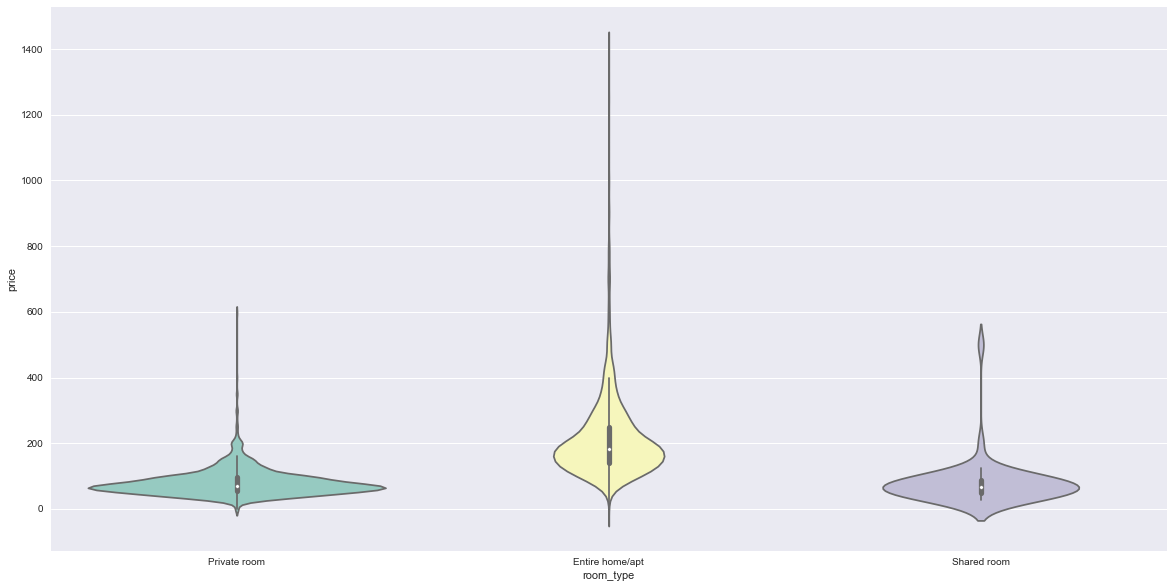

In [15]:
f, ax = plt.subplots(figsize=(20, 10))
sns.violinplot(x="room_type", y="price", data=boston, palette="Set3")

As expected the median price of entire property is expensive in Boston. Interstingly, the median price for a private room and
shared room similar. Although, there are many proprty around the median price of Private room. The price for entire property 
is distrubted more than the others'.

#### What is the price range where properties are popular?

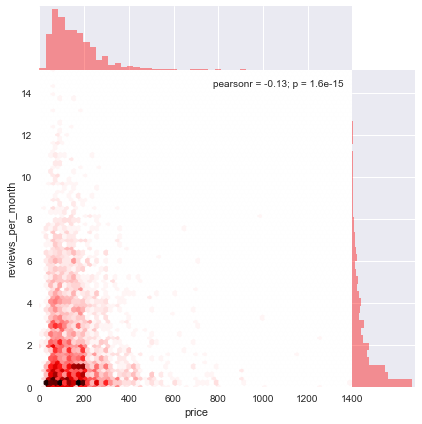

In [16]:
sns.jointplot(y='reviews_per_month', x="price", data=boston, kind="hex", space=0, color="r")

For Boston, most of the cities that are frequently reviewed on the Airbnb website cost less that 200 USD. There are properties which have been reviewed for more than 10 times a month in the price around 100 USD.

It can be further implicated that these are the most popular Airbnb stays and the price most people look for is less than 200USD for a night of stay.

### All cities Listings overview

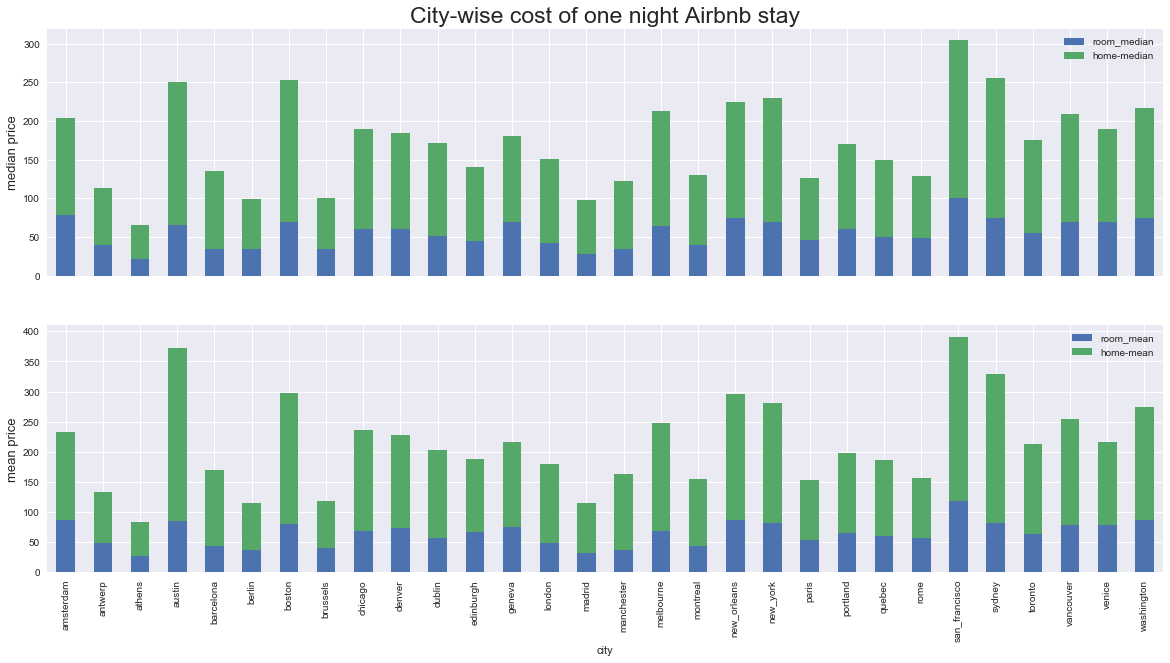

In [17]:
room = private_room[['50%']]
room.columns = ['room_median']
home = entire = entire_home[['50%']]
home.columns = ['home-median']
result = pd.concat([room, home], axis=1, join_axes=[room.index])

room1 = private_room[['mean']]
room1.columns = ['room_mean']
home1 = entire_home[['mean']]
home1.columns = ['home-mean']
result1 = pd.concat([room1, home1], axis=1, join_axes=[room1.index])

fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True)

result.plot.bar(stacked=True, ax=ax[0],  figsize=(20,10));
result1.plot.bar(stacked=True, ax=ax[1],  figsize=(20,10))

ax[0].set_title("City-wise cost of one night Airbnb stay", fontsize = 23)
ax[0].set_ylabel("median price", fontsize = 13) 

ax[1].set_ylabel("mean price", fontsize = 13) 

#### Mean price vs Median price

The mean prices are greater than the median prices in general. Looking over the Airbnb options for rent across these cities, most process are around the median price, however, there are places with extremely higher prices compared to the median prices in the area. These places tend to be closer to the cities and have a more facilities and amenities than a regular Airbnb which only proves a place to stay. These places do not tend to have places for rent on the lower side of the price scale which makes it even more difficult to offset the effect of these higher priced homes. For example (Look it up) Presence of such places for rent in Airbnb may have caused this difference in the medina and mean prices.

### Cost of living Index vs Cost of Airbnb stay

As a part of analysis, I have taken two living index published by two organizations who have different approaches to the calculation of index.
 
[Mercer](https://mobilityexchange.mercer.com/Insights/cost-of-living-rankings#rankings) publishes a Cost-of Living calculator which adjusts for exchange rate, inflation, and availability of products in the country. According to Mercer website, it uses ta standard international basket instead of an adaptable basket like the international currency, Purchasing Power Parity (PPP). However, Mercer does give the option to customize baskets upon request. Although the concept of “international basket” may not be ideal to compare living standards, Mercer does adjust for products that are not available in locations.
 
To calculate its index, Mercer compares the mean prices of what it calls “host city” to that of the base city. The average prices are compared by calculating the average price of each product of the international basket.
 
The [Economist’s](https://www.economist.com/blogs/graphicdetail/2017/03/daily-chart-13) cost-of-living survey compares the prices of 160 goods and services in 133 cities around the world. The Economist’s cost-of-living reports is used by companies to calculate packages for relocations of their employees to international locations. According to the Economist Intelligence Unit, the survey collects data of 50,000 individual prices, and looks at a range of stores of varying price levels. These costs are then converted to U.S. dollars using the up-to-date exchange rates. Like Mercer, this index does not look at a local basket, but uses a fixed international weight.  
 
Both reports use New York as the base city to compare cost-of-living across countries. Although the concept of international basket may not truly represent the actual cost-of-living of countries around the world, using only cities from the OECD decreases the variation as most European countries, U.S., and Australia have similar diets and have almost the same products available in their markets.  



In [18]:
mercer = pd.read_csv(index1) 
econ = pd.read_csv(index2)
mercer = mercer.set_index('city')
econ = econ.set_index('city')

living_index = pd.concat([entire_home['mean'],entire_home['50%'], private_room['mean'],  
                          private_room['50%'],mercer, econ], axis=1)

living_index.columns = ['home_mean', 'home_median','room_mean', 'room_median', 
                        'mercer_rank','econ_rank']

In [19]:
living_index.head(6)

,home_mean,home_median,room_mean,room_median,mercer_rank,econ_rank
city,,,,,,
amsterdam,145.725981,125.0,87.084575,79.0,85.0,55.0
antwerp,85.499301,73.0,48.411371,40.0,NaN,NaN
athens,55.632934,44.0,27.397138,22.0,144.0,92.0
austin,287.415312,185.0,85.106949,65.0,NaN,NaN
barcelona,127.713434,100.0,42.824146,35.0,121.0,39.0
berlin,77.987492,65.0,37.724097,34.0,120.0,51.0


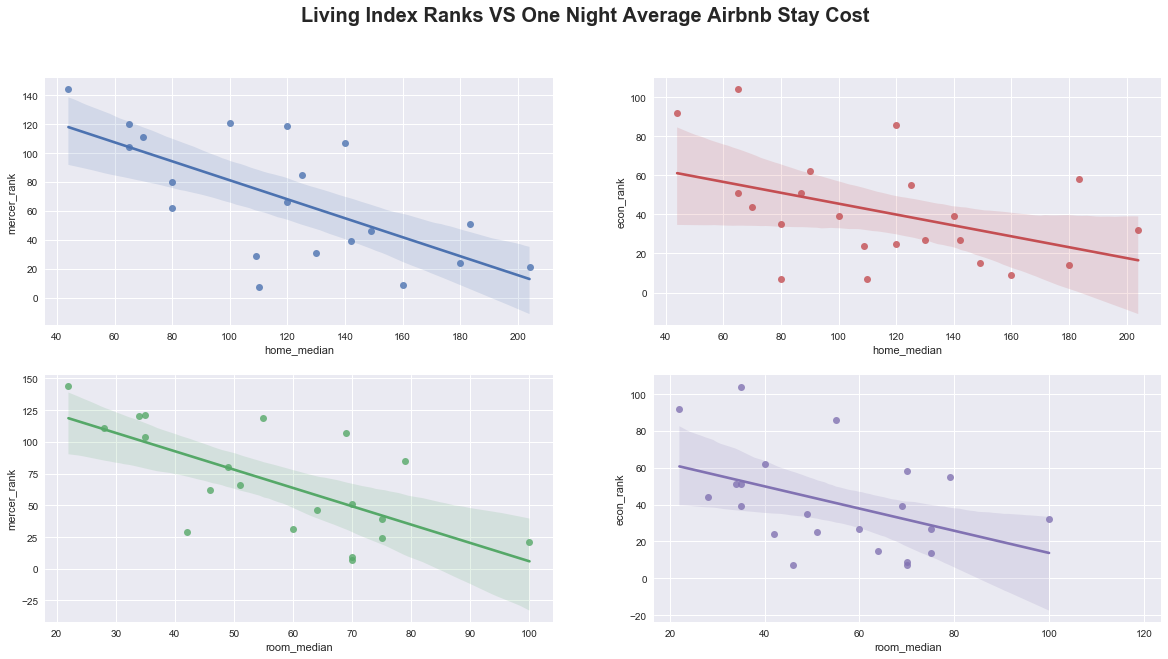

In [20]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,10))

fig.suptitle('Living Index Ranks VS One Night Average Airbnb Stay Cost', 
             fontsize=20, fontweight='bold')

sns.regplot(ax=axes[0,0], x="home_median", y="mercer_rank",
               truncate=True, fit_reg=True, data=living_index)
sns.regplot(ax=axes[1,0], x="room_median", y="mercer_rank",
               truncate=True,  data=living_index)

sns.regplot(ax=axes[0,1], x="home_median", y="econ_rank",
               truncate=True,  data=living_index)
sns.regplot(ax=axes[1,1], x="room_median", y="econ_rank",
               truncate=True,  data=living_index)


In [21]:
living_index.corr()

,home_mean,home_median,room_mean,room_median,mercer_rank,econ_rank
home_mean,1.000000,0.977094,0.847668,0.817848,-0.679196,-0.451096
home_median,0.977094,1.000000,0.882042,0.868702,-0.669843,-0.435797
room_mean,0.847668,0.882042,1.000000,0.979282,-0.661781,-0.419709
room_median,0.817848,0.868702,0.979282,1.000000,-0.679171,-0.442021
mercer_rank,-0.679196,-0.669843,-0.661781,-0.679171,1.000000,0.734726
econ_rank,-0.451096,-0.435797,-0.419709,-0.442021,0.734726,1.000000


#### Analyzing two rankings

Mercer data is more correlated with its Airbnb prices compared to the Economist’s data. The coeffecient of Mercer ranking with entire home price is 0.679 whereas the Economist's is 0.451. Potentially because Mercer looks at a basket of goods that is most likely to me used by the locals of a country to reflect the true cost-of-living and affects how rent prices are determined. The inclusion of multiple good that have varying prices among different markets within a country may skew the results as that may not accurately reflect the cost of living for an average household and the goods that they purchase. This variation in the Economist’s sample size may be the reason for its variation in the data and why its cost-of-living data has less correlation with the rent prices compared to Mercer’s data. 

### GDP per capita and Median Airbnb Stay price

Here, I take GDP per Capita of cities and map them against the city's median Airbnb prices. Here, I have done for both, private room as well as the entire property. The Blue color is the correlation shown with the  entire property whereas the red is for the private room.
<br>
Similarly, to ensure the proper display of number of Airbnb listings in each cities, I have incomprated that data with the size of the marker. Each cirle marker represent a city and their size represents the number of listings, the city has. The bigger the size, more listings the host city has.

/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


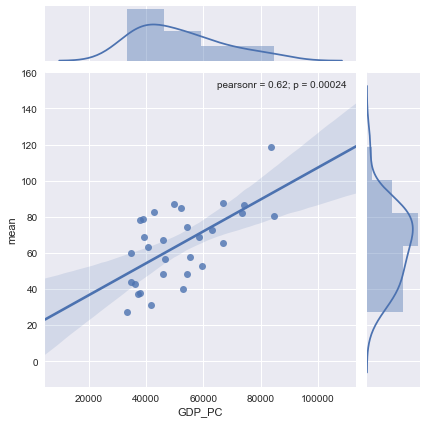

In [22]:
xx=np.log(oecd_private_room['GDP'])
sns.jointplot(x="GDP_PC", y="mean", data=oecd_private_room, kind="reg")

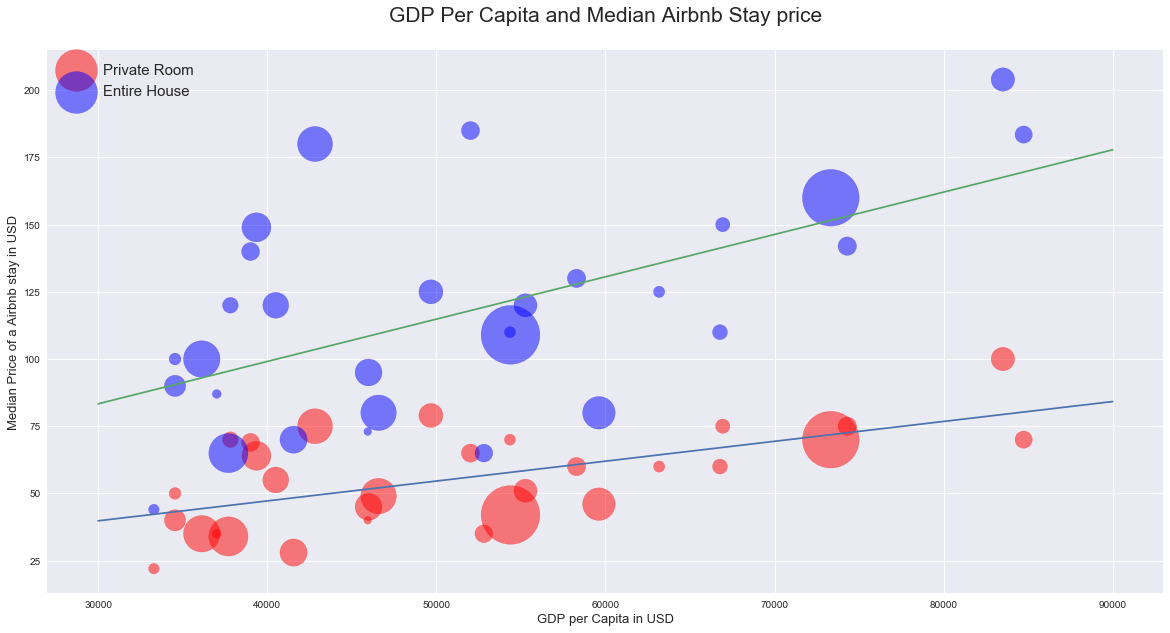

In [23]:

fig, ax = plt.subplots( figsize=(20,10))


ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

s1=(oecd_private_room['count'])/5
plt.scatter((oecd_private_room['GDP_PC']), 
            oecd_private_room['50%'], 
            # the marker as
            marker='o', 
            # the color
            color='r', 
            # the alpha
            alpha=0.5,
            # with size
            s =s1,
           label='Private Room')
plt.scatter((oecd_entire_home['GDP_PC']), 
            oecd_entire_home['50%'], 
            # the marker as
            marker='o', 
            # the color
            color='b', 
            # the alpha
            alpha=0.5,
            # with size
            s =s1,
           label='Entire House')

ax.set_title("GDP Per Capita and Median Airbnb Stay price\n", fontsize = 21)
ax.set_ylabel("Median Price of a Airbnb stay in USD", fontsize = 13) 
ax.set_xlabel("GDP per Capita in USD", fontsize = 13)
plt.legend(loc='upper left', fontsize = '15')


regressionline = sc.stats.linregress(oecd_private_room['GDP_PC'], oecd_private_room['50%'])
m = regressionline[0]
b = regressionline[1]

x = np.linspace(30000, 90000, 100)

plt.plot(x, m*x + b)

regressionline1 = sc.stats.linregress(oecd_entire_home['GDP_PC'], oecd_entire_home['50%'])
m1 = regressionline1[0]
b1 = regressionline1[1]

x1 = np.linspace(30000, 90000, 100)

plt.plot(x1, m1*x1 + b1)


Because the mean prices are skewed as a result of the extremely high prices of a few homes on rent, I am using the median prices to check whether there is a correlation between GDP per capita. As in the graph above, there is a positive correlation between the GDP per capita of a city and the median price of Airbnb rent price. There is a stronger correlation between the GDP per capita of a city and the median price of Airbnb rent price for a private room compared to the median price of the entire house. This difference in correlation can be attributed to a variety of reasons. The strongest argument that I believe in is that as we look at the GDP per capita, we look at the average person. In general, for cities, especially in OECD countries, the average person lives in an apartment, and thus there must be a correlation between the average income of a person and the rent that they pay. This rent price is reflected in the Airbnb rent prices. However, for most cities the average person does not rent a house and the median income thus may not have a strong correlation to what the rent prices are.
 
As for the weaker correlation with prices of entire house, it would be interesting to see the correlation of median prices for entire house in Airbnb and the 75th percentile of income in the city to understand the data better.

### Population density and median Airbnb prices:

In the following chart, I am comparing the cities population densities with their Airbnb cost. As I would expect, a smaller city with high population would have higer Airbnb price as the property price are expected to be high.

Here again, I am taking for both type of properties. The marker size still represntes the number of listings the city has.


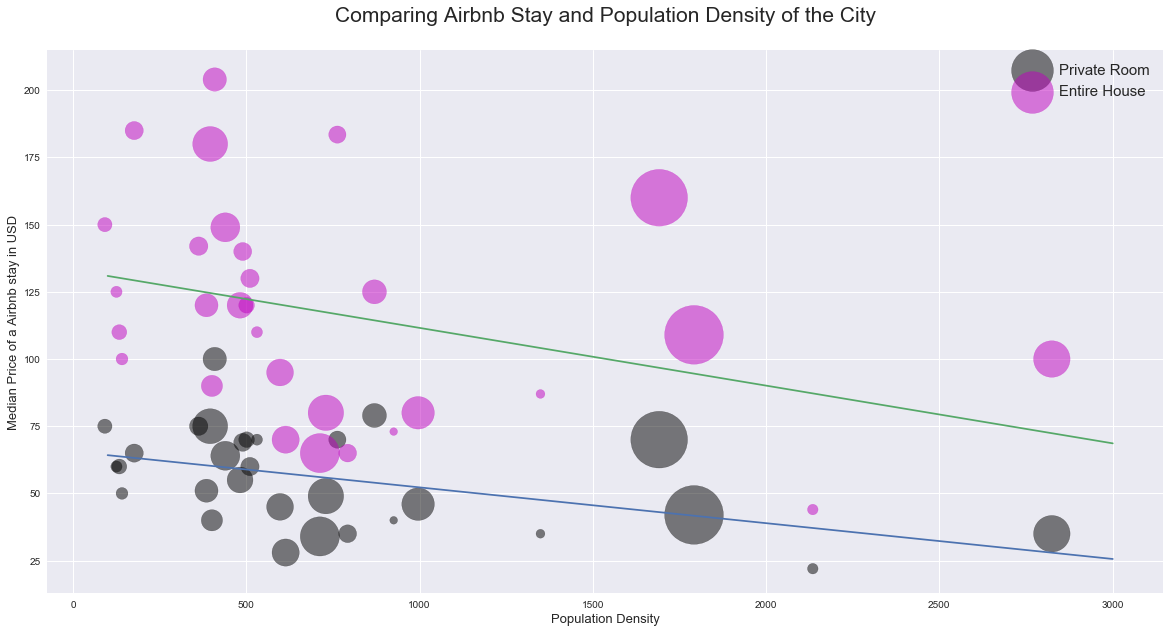

In [32]:
fig, ax = plt.subplots( figsize=(20,10))


ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

s1=(oecd_private_room['count'])/5
plt.scatter((oecd_private_room['POP_DENS']), 
            oecd_private_room['50%'], 
            # the marker as
            marker='o', 
            # the color
            color='k', 
            # the alpha
            alpha=0.5,
            # with size
            s =s1,
           label='Private Room')
plt.scatter((oecd_entire_home['POP_DENS']), 
            oecd_entire_home['50%'], 
            # the marker as
            marker='o', 
            # the color
            color='m', 
            # the alpha
            alpha=0.5,
            # with size
            s =s1,
           label='Entire House')

ax.set_title("Comparing Airbnb Stay and Population Density of the City\n", fontsize = 21)
ax.set_ylabel("Median Price of a Airbnb stay in USD", fontsize = 13) 
ax.set_xlabel("Population Density", fontsize = 13)
plt.legend(loc='upper right', fontsize = '15')



regressionline = sc.stats.linregress(oecd_private_room['POP_DENS'], oecd_private_room['50%'])
m = regressionline[0]
b = regressionline[1]

x = np.linspace(100, 3000, 100)

plt.plot(x, m*x + b)

regressionline1 = sc.stats.linregress(oecd_entire_home['POP_DENS'], oecd_entire_home['50%'])
m1 = regressionline1[0]
b1 = regressionline1[1]

x1 = np.linspace(100, 3000, 100)

plt.plot(x1, m1*x1 + b1)




There is a negative correlation between population density of a city and its median Airbnb prices for both private rooms and cities. As it was for the correlation between median Airbnb prices and GDP per capita of the cities, there is a stronger correlation between population density of a city and the median Airbnb prices of a private room. I expected denser cities to have higher rents as predicted by the basic rule of economics of supply and demand. However, the results from the data do not reflect this assumption. The higher the density of the city, the lower the price of the Airbnb rents.

Higher population density naturally causes higher rent, but for cities in the OECD, the city government could have implemented a rent control law so that housing is available to everyone and so that the rent does not skyrocket. For example New York city has its own rent control law.

There could also be a causal effect of the higher rent on the population density of a city. As we see in San Francisco, it has the highest median Airbnb price with $100 per night for a private room, but its population density is on the lower side with 408.98 people per square kilometers. As in San Francisco, the high prices for rent and the , as reflected by Airbnb prices could have caused the low population density of the city.

My third theory would be availability of Airbnb homes for rent. As for places with low population densities, even if the rent prices are lower, there could be lesser availability of places available for rent in Airbnb and thus resulting in higher prices.
 
As for the weaker correlation between population density and the rent of entire houses, prices for entire houses do not reflect the demand of an average person in a city of a developed country. The median prices of the cities vary wildly for the same range of population density as in the graph. It would be interesting for future works to look into why the prices and results of my analyses are different for entire homes and for private rooms. 


## Conclusion

The simple map (below) represents the data point (cities) I have in project. The intensity of the color those marker illustrates the average median price of Airbnb of those cities.


With this simple project, we can see some trends with the prices of Airbnb and other variables. 
Some of my observations from this project are:

1) As expected the average price of entire properties are higher than other. However, the average price of private room and shared room did not come that different (though I just did for one city). In an average city (Boston), the most popular listings have price less tha 200 USD per night stay.

2) Also, many listings are very expensive due to many reasons. This leads to higher mean price in all city for every types of property than the median price. 

3) Among my cities, San Fransico came as the most expensive place to stay in Airbnb. Compared to US cities, the prices of Airbnb are cheaper in European cities.

4) The living Index of cities have positive correlation with the prices of Airbnb. Among Mercer and Economist, the Mercer ranking has higher correlation with the Airbnb prices.

5) As expected, the places with higher GDP per capita has higher price and vice-versa. However, the lower density cities have higher prices as well. This can have different causation but it was worth noticing.

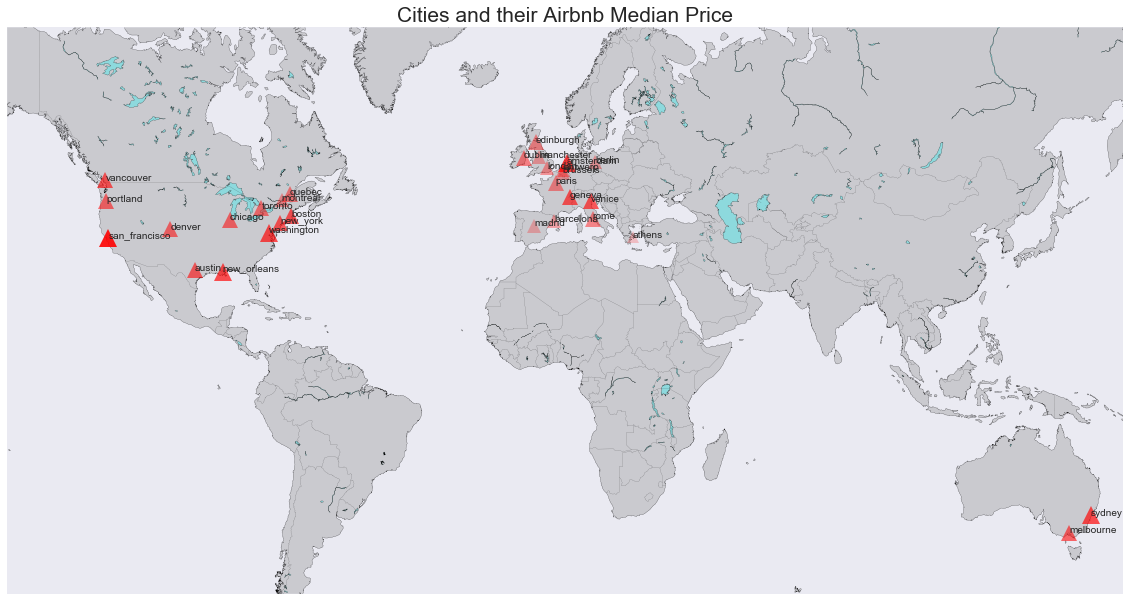

In [26]:
plt.figure(figsize=(20,12))

my_map = Basemap(projection='merc', 
                 resolution = 'l', area_thresh = 1000.0, 
                 llcrnrlon=-150, llcrnrlat=-50, # lower left corner lon and lat
                 urcrnrlon=160, urcrnrlat=70) #upper right corner long and lat


lon = oecd_private_room['X-pos'].tolist() #converting the longtitide column to a list

lat = oecd_private_room['Y-pos'].tolist() #converting laltitude column to a list

labels = oecd_private_room.index.tolist() #label for each marker

x,y = my_map(lon, lat) 

p = oecd_private_room['50%'].tolist() 

min_marker_size = 4 #creating marker size

p1=p
SUM = sum(p) 


for lon, lat, q,size, label in zip(lon, lat, p, p1, labels):
    x,y = my_map(lon, lat)
    y1 = np.log(q) * min_marker_size
    al=(size/SUM)*15 #Providing shade to the marker according to the median price of Airbnb, 
                    #darker the sahde more expensive
    plt.text(x, y, label)
    my_map.plot(x, y, '^', markersize=y1, alpha = al, color = 'r' )
    
    
        
plt.title('Cities and their Airbnb Median Price', fontsize = 21)

my_map.drawcoastlines(linewidth=0.2)
my_map.drawcountries(linewidth=0.1) 

my_map.fillcontinents(color='grey', alpha = 0.3, lake_color='aqua')
plt.show()